<a href="https://colab.research.google.com/github/Rashijain07/rashi_jain/blob/main/Validating__Sales_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

Accessing dataset

In [5]:
from google.colab import files
uploaded=files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset.csv


Load dataset

In [7]:
dataset= pd.read_csv("DigitalAd_dataset.csv")
print(dataset.head(5))

   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


Summarize dataset

In [8]:
print(dataset.shape)

(400, 3)


Splitting dataset into X & Y

In [9]:
X= dataset.iloc[:,:-1]
X

,Age,Salary
0,18,82000
1,29,80000
2,47,25000
3,45,26000
4,46,28000
...,...,...
395,35,65000
396,26,80000
397,26,52000
398,20,86000


In [10]:
Y= dataset.iloc[:,-1]
Y

0      0
1      0
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Status, Length: 400, dtype: int64

Segregating dataset into Train & Test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.25, random_state=0)


Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


Training

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train, y_train)


LogisticRegression(random_state=0)

Predicting for all test cases

In [14]:
y_pred=model.predict(X_test)

Evaluating model

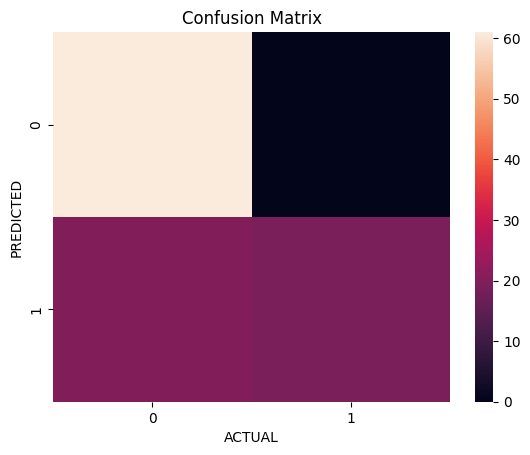

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm)
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTED")
plt.title("Confusion Matrix")
plt.show()

Accuracy Score


In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy:{}%".format(accuracy_score(y_pred, y_test)*100))

Accuracy:80.0%


ROC curve

No Skill: ROC AUC= 50.000
Logistic Skill: ROC AUC=92.980


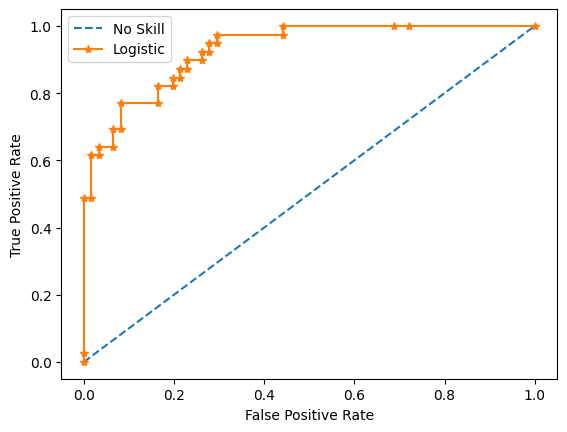

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability=[0 for _ in range(len(y_test))]
lsProbability=model.predict_proba(X_test)
#keep probab for the positive outcomes only
lsProbability= lsProbability[:, 1]
#calculate scores
nsAUC= roc_auc_score(y_test,nsProbability)
lrAUC=roc_auc_score(y_test, lsProbability)
#summarize scores
print('No Skill: ROC AUC= %.3F' % (nsAUC*100))
print('Logistic Skill: ROC AUC=%.3f' % (lrAUC*100))
#calculate roc curves
nsFP, nsTP, _= roc_curve(y_test, nsProbability)
lrFP, lrTP, _=roc_curve(y_test, lsProbability)
#plot the roc curve for the model
plt.plot(nsFP,nsTP,linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Cross Validation Score

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold= KFold(n_splits=10, random_state=100, shuffle=True)
result= cross_val_score(model, X, Y, cv=kfold)
print("Cross Validation Score: %.2f%%" %(result.mean()*100.0))

Cross Validation Score: 64.25%


Stratified K- fold Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold= StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
model_skfold= LogisticRegression()
results_skfold= cross_val_score(model_skfold, X, Y, cv=skfold)
print("STRATIFIED K-FOLD SCORE: %.2f%%" %(results_skfold.mean()*100.0))


STRATIFIED K-FOLD SCORE: 64.25%


Cumulative Accuracy Profile: CAP Curve

39


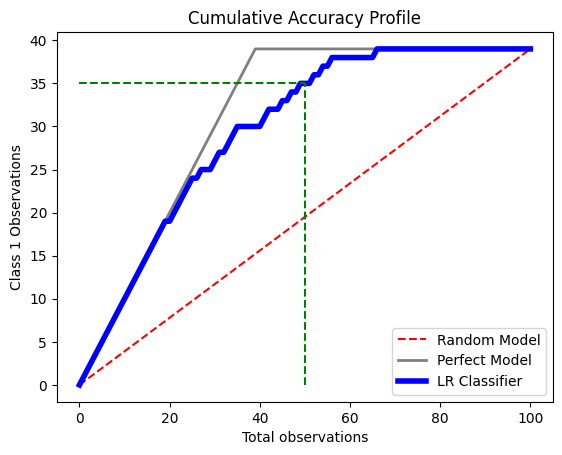

In [31]:
total=len(y_test)
class_1_count=np.sum(y_test)
print(class_1_count)
class_0_count= total- class_1_count
plt.plot([0,total], [0,class_1_count], c='r', linestyle='--', label='Random Model')

plt.plot([0,class_1_count, total],
         [0,class_1_count,class_1_count],
         c='grey',
         linewidth=2,
         label='Perfect Model')

probs= model.predict_proba(X_test)
probs=probs[:,1]
model_y=[y for _, y in sorted(zip(probs, y_test), reverse=True)]
y_values=np.append([0], np.cumsum(model_y))
x_values=np.arange(0, total+1)

plt.plot(x_values,
         y_values,
         c='b',
         label='LR Classifier',
         linewidth=4)
index=int((50*total/100))

#50% vertical line from x_axis
plt.plot([index, index], [0,y_values[index]], c='g', linestyle='--')
#Horizontal line to y-axis from prediction model
plt.plot([0,index], [y_values[index], y_values[index]], c='g', linestyle='--')
class_1_observed = y_values[index] *100 / max(y_values)
plt.xlabel('Total observations')
plt.ylabel('Class 1 Observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc='lower right')